# Pandas Notebook 1, ATM350 Spring 2023
***

Here, we read in a text file that has climatological data compiled at the National Weather Service in Albany NY for 2022, previously downloaded and reformatted from the [xmACIS2](https://xmacis.rcc-acis.org) climate data portal.

We will use the <a href = "https://pandas.pydata.org/">Pandas</a> library to read and analyze the data. We will also use the <a href="https://matplotlib.org/">Matplotlib</a> package to visualize it.

## Motivating Science Questions:
1. How can we analyze and display *tabular climate data* for a site?
2. What was the yearly trace of max/min temperatures for Albany, NY last year?
3. What was the most common 10-degree maximum temperature range for Albany, NY last year?

In [1]:
# import Pandas and Numpy, and use their conventional two-letter abbreviations when we
# use methods from these packages. Also, import matplotlib's plotting package, using its 
# standard abbreviation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Specify the location of the file that contains the climo data. Use the linux <b>ls</b> command to verify it exists. 
#### Note that in a Jupyter notebook, we can simply use the <i>!</i> directive to "call" a Linux command. 
#### Also notice how we refer to a Python variable name when passing it to a Linux command line in this way ... we enclose it in braces!

In [2]:
file = '/spare11/atm350/common/data/climo_alb_2022.csv'
! ls -l {file}

-rw-r--r--. 1 ktyle faculty 15242 Feb 20 19:40 /spare11/atm350/common/data/climo_alb_2022.csv


## Use pandas' `read_csv` method to open the file. Specify that the data is to be read in as strings (not integers nor floating points).
### Once this call succeeds, it returns a <i>Pandas Dataframe</i> object which we reference as `df`

In [3]:
df = pd.read_csv(file, dtype='string')

## By simply typing the name of the dataframe object, we can get some of its contents to be "pretty-printed" to the notebook!

In [4]:
df

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
0,2022-01-01,51,41,46.0,19.7,19,0,0.12,0.0,0
1,2022-01-02,49,23,36.0,9.9,29,0,0.07,0.2,0
2,2022-01-03,23,13,18.0,-7.9,47,0,T,T,T
3,2022-01-04,29,10,19.5,-6.2,45,0,T,0.1,T
4,2022-01-05,38,28,33.0,7.5,32,0,0.00,0.0,T
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,34,22,28.0,0.6,37,0,0.00,0.0,T
361,2022-12-28,41,22,31.5,4.3,33,0,0.00,0.0,T
362,2022-12-29,48,22,35.0,8.1,30,0,0.00,0.0,T
363,2022-12-30,57,43,50.0,23.3,15,0,0.00,0.0,0


### Our dataframe has 365 rows (corresponding to all the days in the year 2022) and 10 columns that contain data. This is expressed by calling the `shape` attribute of the dataframe. The first number in the pair is the # of rows, while the second is the # of columns.

In [5]:
df.shape

(365, 10)

### It will be useful to have a variable (more accurately, an <i>object</i> ) that holds the value of the number of rows, and another for the number of columns.
#### Remember that Python is a language that uses <i>zero-based</i> indexing, so the first value is accessed as element 0, and the second as element 1!
#### Look at the syntax we use below to print out the (integer) value of nRows ... it's another example of **string formating**.

In [6]:
nRows = df.shape[0]
print ("Number of rows = %d" % nRows )

Number of rows = 365


### Let's do the same for the # of columns.

In [7]:
nCols = df.shape[1]
print ("Number of columns = %d" % nCols)

Number of columns = 10


### To access the values in a particular column, we reference it with its column name as a string. The next cell pulls in all values of the year-month-date column, and assigns it to an object of the same name. We could have named the object anything we wanted, not just **Date** ... but on the right side of the assignment statement, we have to use the exact name of the column. 

Print out what this object looks like.

In [8]:
Date = df['DATE']
print (Date)

0      2022-01-01
1      2022-01-02
2      2022-01-03
3      2022-01-04
4      2022-01-05
          ...    
360    2022-12-27
361    2022-12-28
362    2022-12-29
363    2022-12-30
364    2022-12-31
Name: DATE, Length: 365, dtype: string


### Each column of a Pandas dataframe is known as a <i>series</i>. It is basically an array of values, each of which has a corresponding row #. By default, row #'s accompanying a Series are numbered consecutively, starting with 0 (since Python's convention is to use <i>zero-based indexing </i>).

### We can reference a particular value, or set of values, of a Series by using array-based notation. Below, let's print out the first 30 rows of the dates.

In [9]:
print (Date[:30])

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
5     2022-01-06
6     2022-01-07
7     2022-01-08
8     2022-01-09
9     2022-01-10
10    2022-01-11
11    2022-01-12
12    2022-01-13
13    2022-01-14
14    2022-01-15
15    2022-01-16
16    2022-01-17
17    2022-01-18
18    2022-01-19
19    2022-01-20
20    2022-01-21
21    2022-01-22
22    2022-01-23
23    2022-01-24
24    2022-01-25
25    2022-01-26
26    2022-01-27
27    2022-01-28
28    2022-01-29
29    2022-01-30
Name: DATE, dtype: string


### Similarly, let's print out the last, or 364th row (Why is it 364, not 365???)

In [10]:
print(Date[364])

2022-12-31


Note that using -1 as the last index doesn't work!

In [11]:
print(Date[-1])

KeyError: -1

However, using a negative value as part of a *slice* does work:

In [12]:
print(Date[-9:])

356    2022-12-23
357    2022-12-24
358    2022-12-25
359    2022-12-26
360    2022-12-27
361    2022-12-28
362    2022-12-29
363    2022-12-30
364    2022-12-31
Name: DATE, dtype: string


### EXERCISE: Now, let's create new Series objects; one for Max Temp (name it *maxT*), and the other for Min Temp (name it *minT*).

In [13]:
# %load /spare11/atm350/common/feb21/01a.py
maxT = df['MAX']
minT = df['MIN']


In [14]:
maxT=df['MAX']
print(maxT)

0      51
1      49
2      23
3      29
4      38
       ..
360    34
361    41
362    48
363    57
364    53
Name: MAX, Length: 365, dtype: string


In [15]:
minT=df['MIN']
print(minT)

0      41
1      23
2      13
3      10
4      28
       ..
360    22
361    22
362    22
363    43
364    44
Name: MIN, Length: 365, dtype: string


## Let's now list all the days that the high temperature was >= 90. Note carefully how we express this test. It will fail!

In [16]:
hotDays = maxT >= 90

TypeError: '>=' not supported between instances of 'str' and 'int'

### Why did it fail? Remember, when we read in the file, we had Pandas assign the type of every column to <i>string</i>! We need to change the type of maxT to a numerical value. Let's use a 32-bit floating point #, as that will be more than enough precision for this type of measurement. We'll do the same for the minimum temp.

In [17]:
maxT = maxT.astype("float32")
minT = minT.astype("float32")

In [18]:
maxT

0      51.0
1      49.0
2      23.0
3      29.0
4      38.0
       ... 
360    34.0
361    41.0
362    48.0
363    57.0
364    53.0
Name: MAX, Length: 365, dtype: float32

In [19]:
hotDays = maxT >= 90

### Now, the test works. What does this data series look like? It actually is a table of <i>booleans</i> ... i.e., true/false values.

In [20]:
print (hotDays)

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: MAX, Length: 365, dtype: bool


### As the default output only includes the first and last 5 rows , let's `slice` and pull out a period in the middle of the year, where we might be more likely to get some `True`s!

In [21]:
print (hotDays[180:195])

180    False
181     True
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191     True
192     True
193    False
194    False
Name: MAX, dtype: bool


## Now, let's get a count of the # of days meeting this temperature criterion. Note carefully that we first have to express our set of days exceeding the threshold as a Pandas series. Then, recall that to get a count of the # of rows, we take the first (0th) element of the array returned by a call to the `shape` method.

In [22]:
df[maxT >= 90]

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
140,2022-05-21,91,65,78.0,16.8,0,13,0.00,0.0,0
141,2022-05-22,90,59,74.5,13.0,0,10,0.09,0.0,0
150,2022-05-31,92,65,78.5,14.4,0,14,0.00,0.0,0
175,2022-06-25,91,58,74.5,3.6,0,10,0.00,0.0,0
176,2022-06-26,93,61,77.0,5.8,0,12,0.00,0.0,0
181,2022-07-01,95,68,81.5,9.4,0,17,0.13,0.0,0
191,2022-07-11,91,55,73.0,-0.3,0,8,0.00,0.0,0
192,2022-07-12,91,70,80.5,7.2,0,16,T,0.0,0
197,2022-07-17,92,67,79.5,6.0,0,15,0.00,0.0,0
199,2022-07-19,92,71,81.5,8.0,0,17,0.00,0.0,0


In [26]:
df[maxT >= 90].shape[0]

25

### Let's reverse the sense of the test, and get its count. The two counts should add up to 365!

In [27]:
df[maxT < 90].shape[0]

340

### We can combine a test of two different thresholds. Let's get a count of days where the max. temperature was in the 70s or 80s.

In [28]:
df[(maxT< 90) & (maxT>=70)].shape[0]

118

## Let's show all the climate data for all these "pleasantly warm" days!

In [29]:
pleasant = df[(maxT< 90) & (maxT>=70)]
pleasant

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
76,2022-03-18,71,43,57.0,20.7,8,0,0.00,0.0,0
102,2022-04-13,77,41,59.0,12.1,6,0,T,0.0,0
103,2022-04-14,82,45,63.5,16.1,1,0,0.01,0.0,0
113,2022-04-24,72,45,58.5,6.6,6,0,T,0.0,0
128,2022-05-09,75,35,55.0,-2.6,10,0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
298,2022-10-26,76,58,67.0,19.3,0,2,0.00,0.0,0
307,2022-11-04,71,46,58.5,14.0,6,0,0.00,0.0,0
308,2022-11-05,76,61,68.5,24.3,0,4,0.00,0.0,0
309,2022-11-06,72,67,69.5,25.7,0,5,0.00,0.0,0


## Notice that after a certain point, not all the rows are displayed to the notebook. We can eliminate the limit of maximum rows and thus show all of the matching days.

In [30]:
pd.set_option ('display.max_rows', None)
pleasant

,DATE,MAX,MIN,AVG,DEP,HDD,CDD,PCP,SNW,DPT
76,2022-03-18,71,43,57.0,20.7,8,0,0.00,0.0,0
102,2022-04-13,77,41,59.0,12.1,6,0,T,0.0,0
103,2022-04-14,82,45,63.5,16.1,1,0,0.01,0.0,0
113,2022-04-24,72,45,58.5,6.6,6,0,T,0.0,0
128,2022-05-09,75,35,55.0,-2.6,10,0,0.00,0.0,0
129,2022-05-10,77,39,58.0,0.1,7,0,0.00,0.0,0
130,2022-05-11,82,40,61.0,2.8,4,0,0.00,0.0,0
131,2022-05-12,87,44,65.5,6.9,0,1,0.00,0.0,0
132,2022-05-13,84,62,73.0,14.1,0,8,0.00,0.0,0
133,2022-05-14,84,66,75.0,15.8,0,10,0.07,0.0,0


##### Now let's visualize the temperature trace over the year! Pandas has a method that directly calls Matplotlib's plotting package.

<AxesSubplot:>

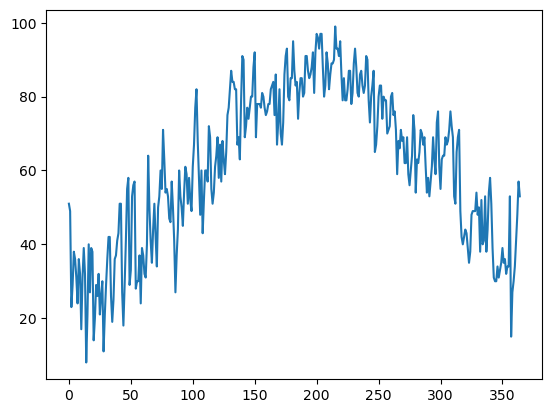

In [31]:
maxT.plot()

<AxesSubplot:>

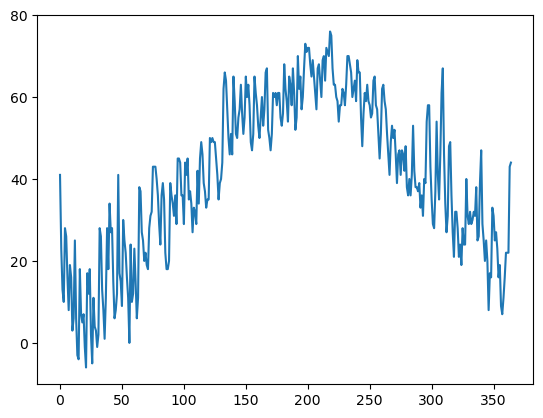

In [32]:
minT.plot()

### The data plotted fine, but the look could be better. First, let's import a package, `seaborn`, that when imported and `set` using its own method, makes matplotlib's graphs look better.

Info on seaborn: https://seaborn.pydata.org/index.html

In [33]:
import seaborn as sns
sns.set()

<AxesSubplot:>

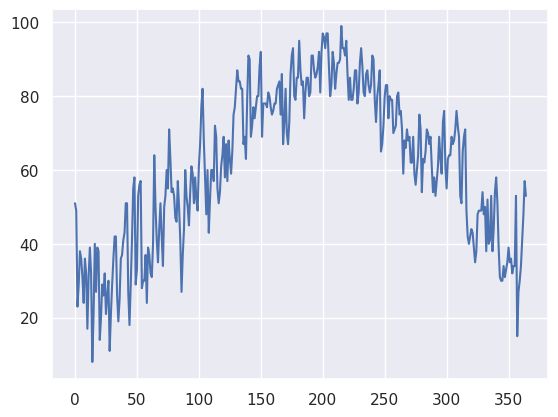

In [34]:
maxT.plot()

<AxesSubplot:>

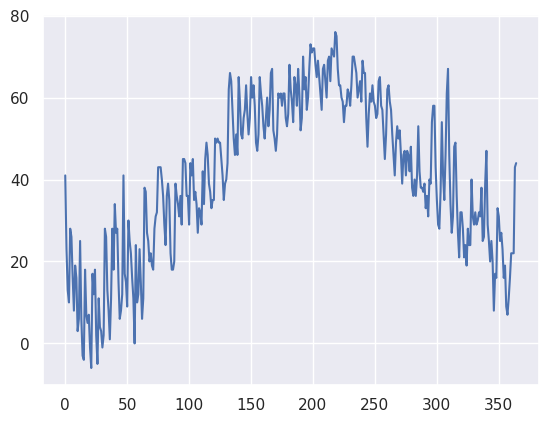

In [39]:
minT.plot()

### Next, let's plot the two traces simultaneously on the graph so we can better discern max and min temps (this will also enure a single y-axis that will encompass the range of temperature values). We'll also add some helpful labels and expand the size of the figure.

Text(0, 0.5, 'Temperature ($^\\circ$F)')

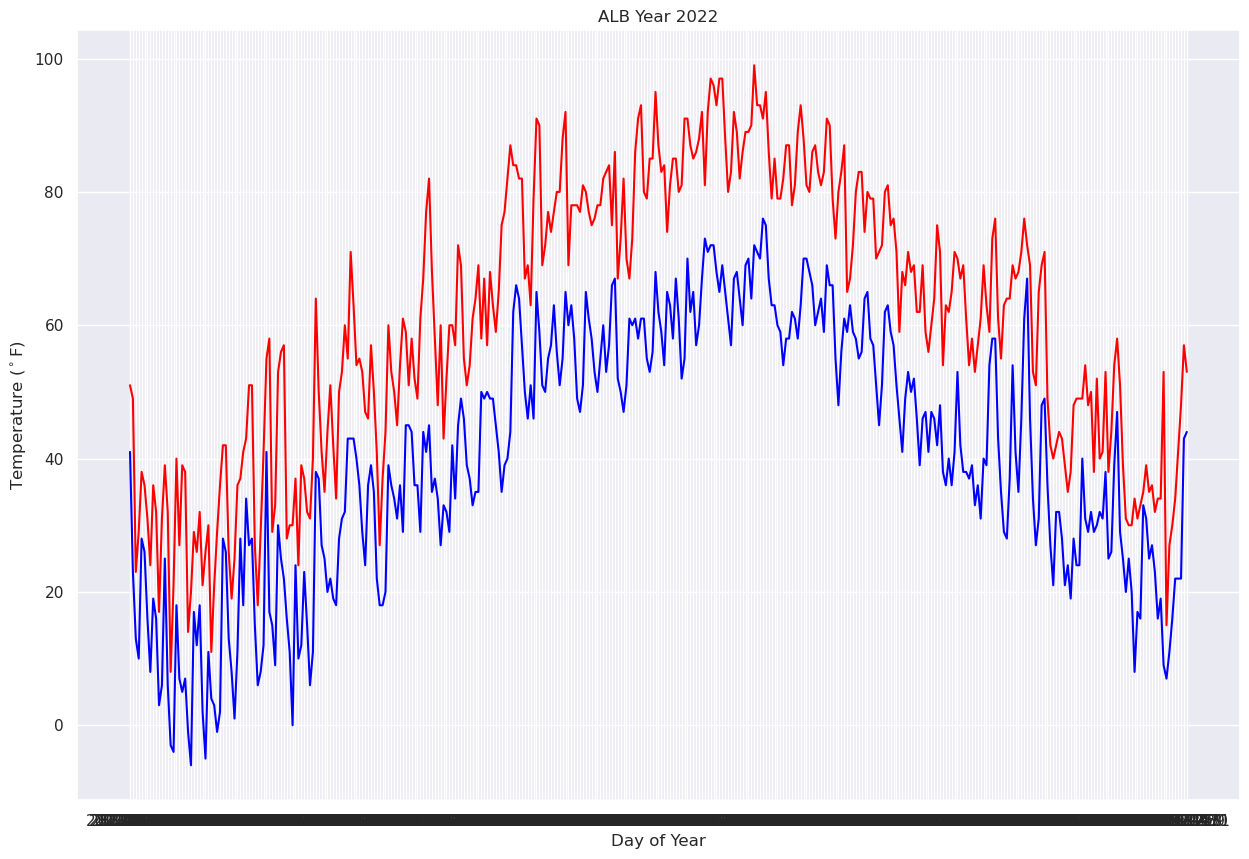

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (Date, maxT, color='red')
ax.plot (Date, minT, color='blue')
ax.set_title ("ALB Year 2022")
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature ($^\circ$F)')


### You will notice that this graphic took some time to render. Note that the x-axis label is virtually unreadable. This is because every date is being printed! 

### We will deal with this by using one of Pandas' methods that take strings and convert them to a special type of data ... not strings nor numbers, but <i>datetime</i> objects. Note carefully how we do this here ... it is not terribly intuitive, but we'll explain it more in an upcoming lecture/notebook on `datetime`. You will see though that the output column now looks a bit more *date-like*, with a four-digit year followed by two-digit month and date.

In [38]:
Date = pd.to_datetime(Date,format="%Y-%m-%d")
Date

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
5     2022-01-06
6     2022-01-07
7     2022-01-08
8     2022-01-09
9     2022-01-10
10    2022-01-11
11    2022-01-12
12    2022-01-13
13    2022-01-14
14    2022-01-15
15    2022-01-16
16    2022-01-17
17    2022-01-18
18    2022-01-19
19    2022-01-20
20    2022-01-21
21    2022-01-22
22    2022-01-23
23    2022-01-24
24    2022-01-25
25    2022-01-26
26    2022-01-27
27    2022-01-28
28    2022-01-29
29    2022-01-30
30    2022-01-31
31    2022-02-01
32    2022-02-02
33    2022-02-03
34    2022-02-04
35    2022-02-05
36    2022-02-06
37    2022-02-07
38    2022-02-08
39    2022-02-09
40    2022-02-10
41    2022-02-11
42    2022-02-12
43    2022-02-13
44    2022-02-14
45    2022-02-15
46    2022-02-16
47    2022-02-17
48    2022-02-18
49    2022-02-19
50    2022-02-20
51    2022-02-21
52    2022-02-22
53    2022-02-23
54    2022-02-24
55    2022-02-25
56    2022-02-26
57    2022-02-27
58    2022-02-

### Matplotlib will recognize this array as being date/time-related, and when we pass it in as the x-axis, the graphic appears faster, and we also have a more meaningful x-axis label.

Text(0, 0.5, 'Temperature ($^\\circ$F)')

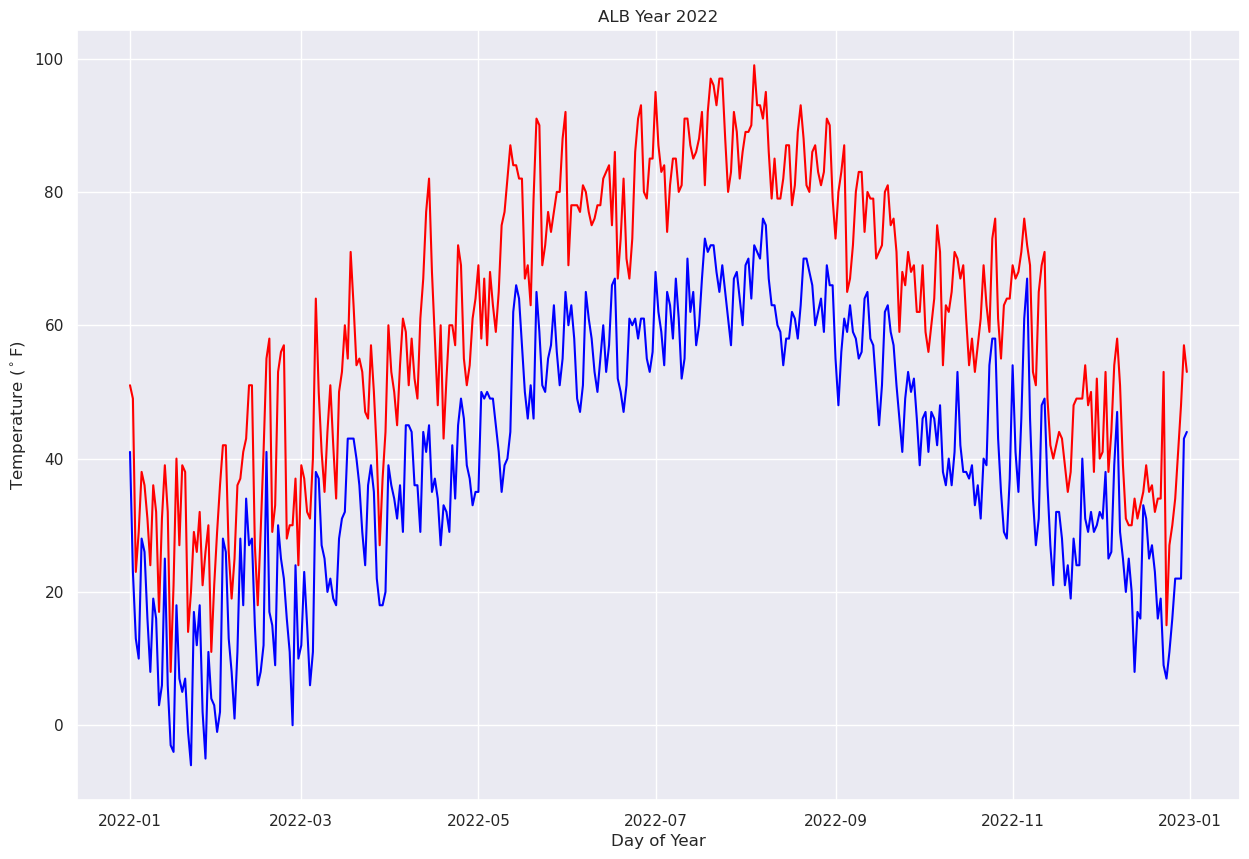

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (Date, maxT, color='red')
ax.plot (Date, minT, color='blue')
ax.set_title ("ALB Year 2022")
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temperature ($^\circ$F)')#; #adding a semi colon makes the random text go away "Text (0, 0.5, 'Temperature...)"


### We'll further refine the look of the plot by adding a legend and have vertical grid lines on a frequency of one month.

In [44]:
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator

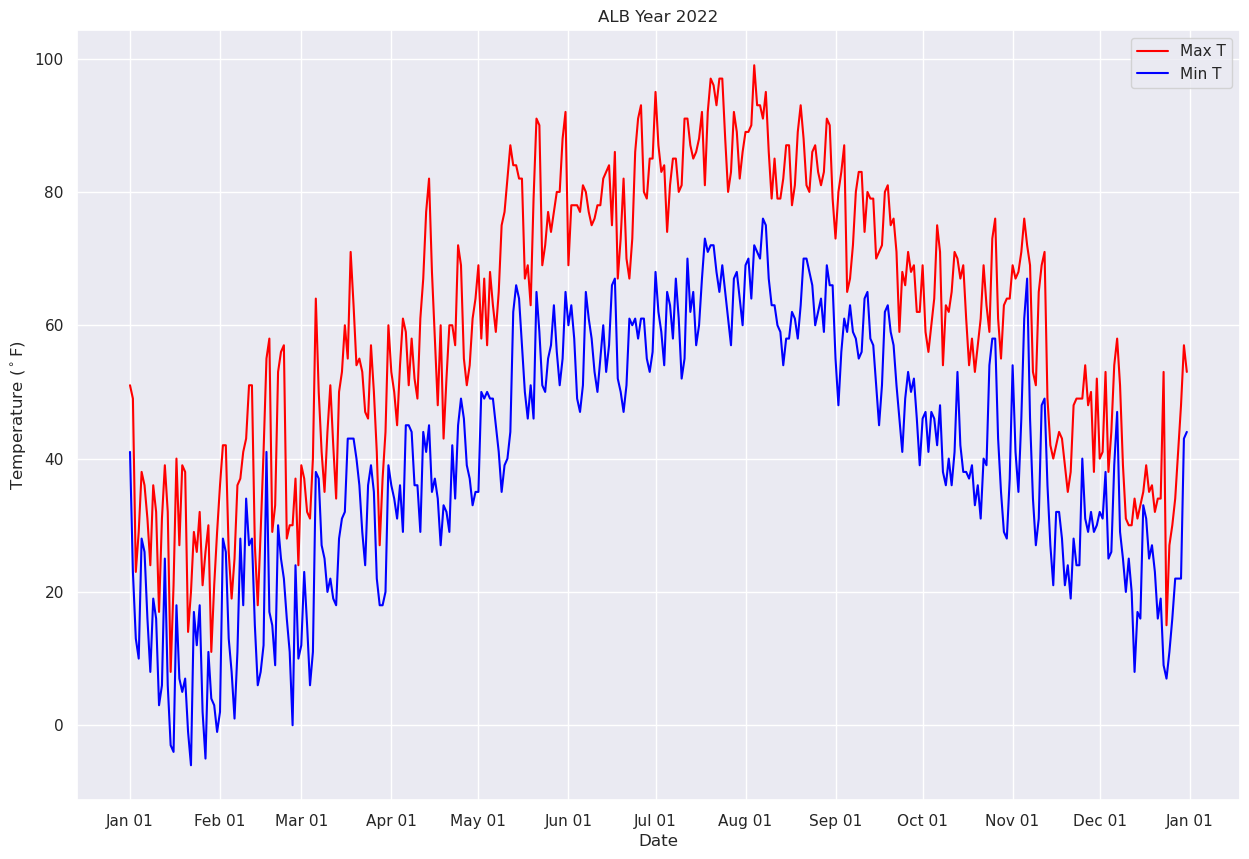

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (Date, maxT, color='red',label = "Max T")
ax.plot (Date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year 2022")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1)) #interval of every month
dateFmt = DateFormatter('%b %d') #%b is 3 letter abbreviation of month and %d is the data
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

### Let's save our beautiful graphic to disk.

In [47]:
fig.savefig ('albTemps2022.png') #saves it in the folder you are currently in

## Now, let's answer the question, "what was the most common range of maximum temperatures last year in Albany?" via a histogram. We use `matplotlib`'s `hist` method.

(array([ 5., 13., 37., 42., 38., 46., 52., 52., 55., 25.]),
 array([ 8. , 17.1, 26.2, 35.3, 44.4, 53.5, 62.6, 71.7, 80.8, 89.9, 99. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

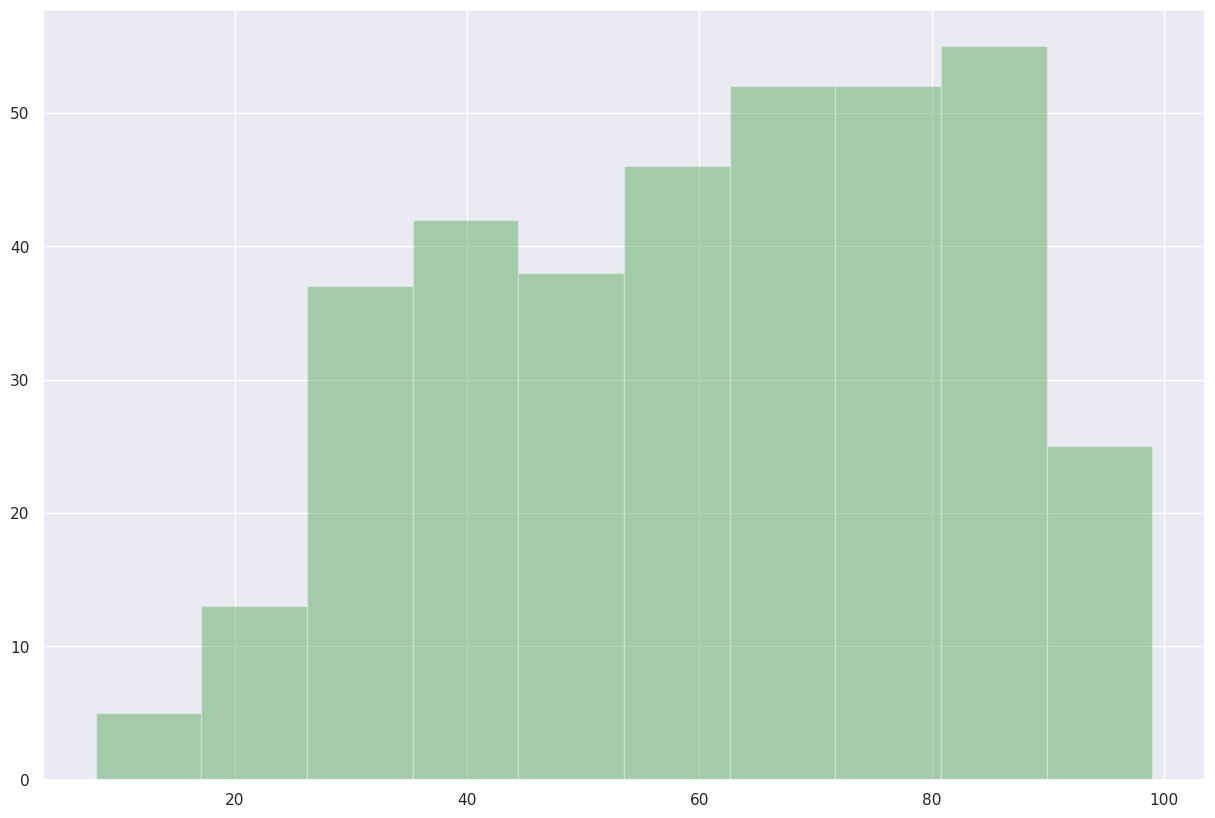

In [58]:
# Create a figure and size it.
fig, ax = plt.subplots(figsize=(15,10))
# Create a histogram of our data series and divide it in to 10 bins.
ax.hist(maxT, bins=10, color='green', alpha=0.3) #color='k' is black

## Ok, but the 10 bins were autoselected. Let's customize our call to the `hist` method by specifying the bounds of each of our bins.
### How can we learn more about how to customize this call? Append a `?` to the name of the method.

In [59]:
ax.hist?

Signature:
ax.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

Pa

### Revise the call to `ax.hist`, and also draw tick marks that align with the bounds of the histogram's bins.

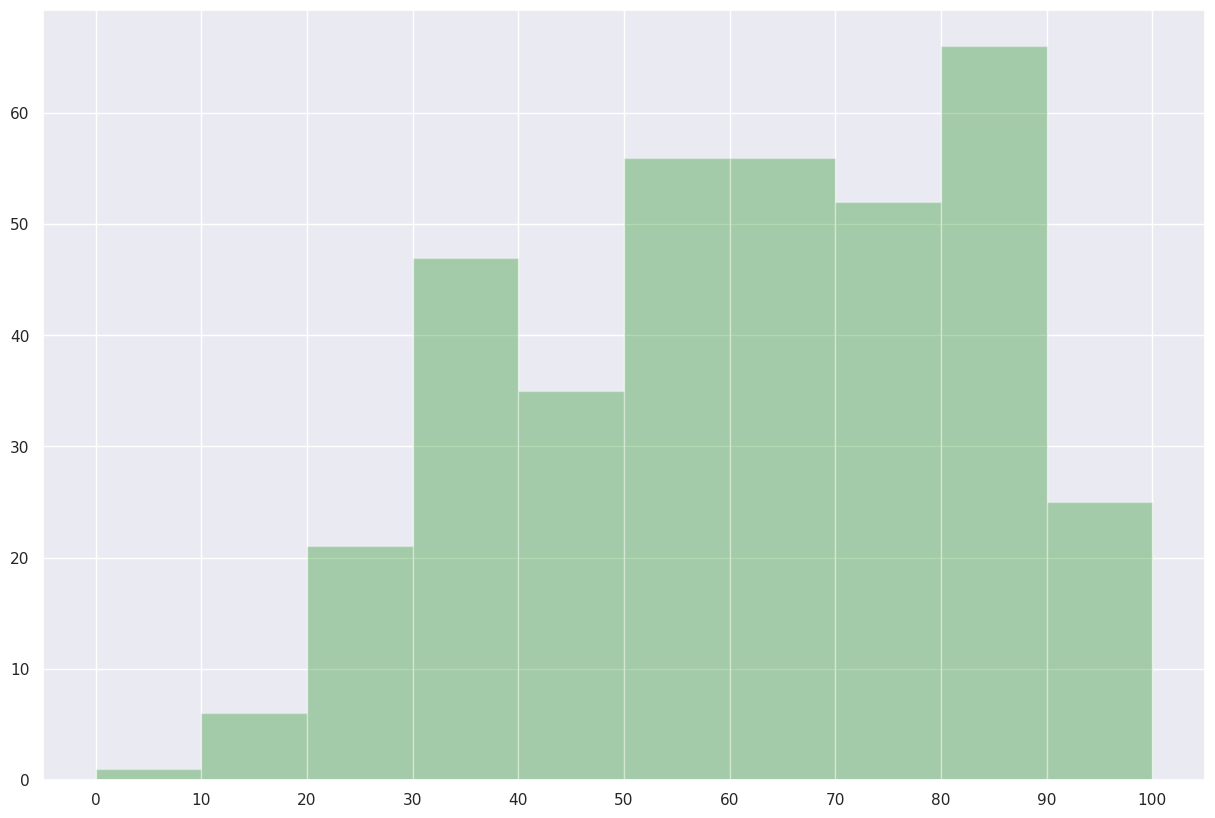

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(maxT, bins=(0,10,20,30,40,50,60,70,80,90,100), color='green', alpha=0.3)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

### Save this histogram to disk.

In [61]:
fig.savefig("maxT_hist.png")

Use the `describe` method on the maximum temperature series to reveal some simple statistical properties.

In [62]:
maxT.describe()

count    365.000000
mean      60.915070
std       21.009434
min        8.000000
25%       43.000000
50%       63.000000
75%       79.000000
max       99.000000
Name: MAX, dtype: float64

## References

1. [Project Pythia: Pandas](https://foundations.projectpythia.org/core/pandas.html)
2. [The Carpentries: Pandas](https://swcarpentry.github.io/python-novice-gapminder/07-reading-tabular/index.html)
3. [Matplotlib: Setting x/y-axis tick label properties](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html)